In [5]:
import pandas as pd 
import numpy as np
from plotnine import *
from datetime import datetime 
from pandas.api.types import CategoricalDtype


https://www.kaggle.com/janiobachmann/price-of-avocados-pattern-recognition-analysis

In [2]:
df = pd.read_csv('avocado.csv')
df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [13]:
# split ymd column to year, month and date columns

year = []
month = []
day = []
for i in range(df.shape[0]):
    date = datetime.strptime(df['Date'].iloc[i],'%Y-%m-%d')
    year.append(date.year)
    month.append(date.month)
    day.append(date.day)

df['year'] = year
df['month'] = month
df['day'] = day

# replace numerical month to words
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_dict = {}
for i in range(len(months)):
    month_dict[i+1] = months[i]

df = df.replace({'month': month_dict})


### line chart 

In [230]:
gp = df[df['type'] == 'conventional'][['year', 'month', 'AveragePrice']]
# the variable that is used as color has to be categorical
gp['month'] = gp['month'].astype(str)

# keep data from 2015 to 2017 only
gp = gp[~gp['year'].isin(['2018'])]

line_df = gp.groupby(['year', 'month']).mean().reset_index()

ordered_months = CategoricalDtype(categories = months, ordered = True)
line_df['ordered_months'] = line_df['month'].astype(str).astype(ordered_months)


/Users/yueying.teng/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


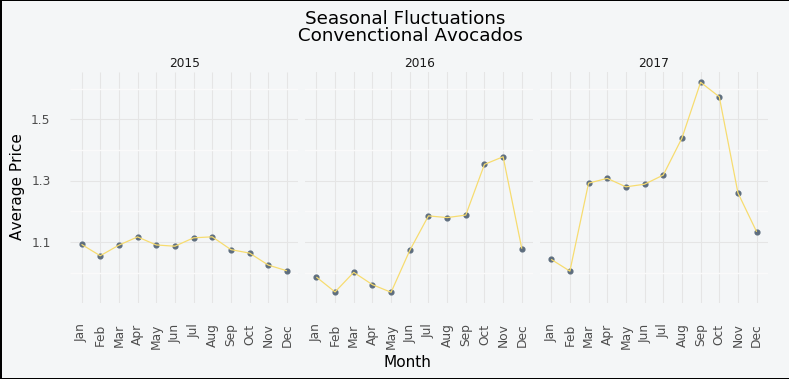

<ggplot: (7565871294)>

In [236]:
(ggplot(line_df)
 + aes(x = 'ordered_months', y = 'AveragePrice')
 + geom_point(color = '#5D6D7E')
 + geom_line(group = 1, color = '#F7DC6F')
 + facet_wrap('year')
 + theme_minimal()
 + theme(plot_title = element_text(hjust = 0.5),
        plot_background = element_rect(fill = '#F4F6F7'),
        axis_text_x = element_text(angle = 90),
        figure_size = (9, 3))
 + labs(title = "Seasonal Fluctuations \n Convenctional Avocados", x = "Month", y = "Average Price")
)


### bubble chart 

In [242]:
gp = df[df['type'] == 'conventional'][['year', 'month', 'AveragePrice']]
# the variable that is used as color has to be categorical
gp['month'] = gp['month'].astype(str)

# keep data from 2015 to 2017 only
gp = gp[~gp['year'].isin(['2018'])]

vol_df = gp.groupby(['year', 'month']).std().reset_index()
vol_df.rename(columns = {'AveragePrice': 'volatility'}, inplace = True)

# reorder month to be not alphabetically ordered
ordered_months = CategoricalDtype(categories = months, ordered = True)
vol_df['ordered_months'] = vol_df['month'].astype(str).astype(ordered_months)


/Users/yueying.teng/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Users/yueying.teng/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


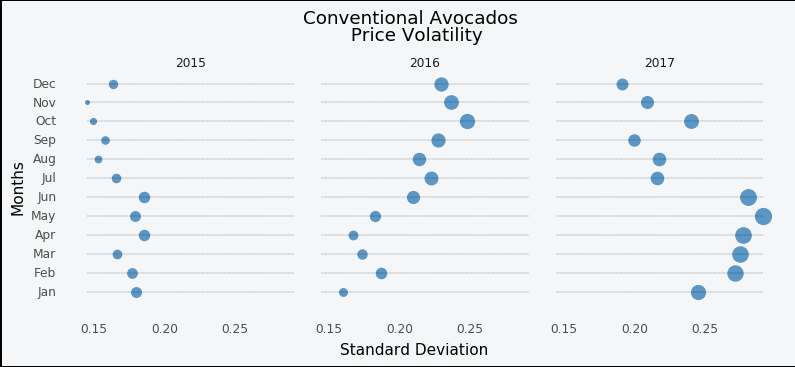

<ggplot: (7567198398)>

In [267]:
(ggplot(vol_df)
+ aes(x = 'ordered_months', y = 'volatility')
+ geom_point(aes(size = vol_df['volatility']), color = '#5A96C6')
+ geom_segment(aes(x = 'ordered_months',
                xend = 'ordered_months',
                y = min(vol_df['volatility']),
                yend = max(vol_df['volatility'])),
                linetype = 'dashed',
                size = 0.1)
+ coord_flip()
+ facet_wrap('year')
+ theme_minimal()
+ theme(plot_title = element_text(hjust = 0.5),
        plot_background = element_rect(fill = '#F4F6F7'),
        legend_position = 'none',
        panel_grid = element_blank(), # remove gridline
        figure_size = (9, 3))
+ labs(title = "Conventional Avocados \n Price Volatility", x = "Months", y = "Standard Deviation")
)


### circular barplot

In [214]:

# keep data from 2015 to 2017 only
gp = gp[~gp['year'].isin(['2018'])]

conv_df = gp.groupby(['year', 'month']).mean()


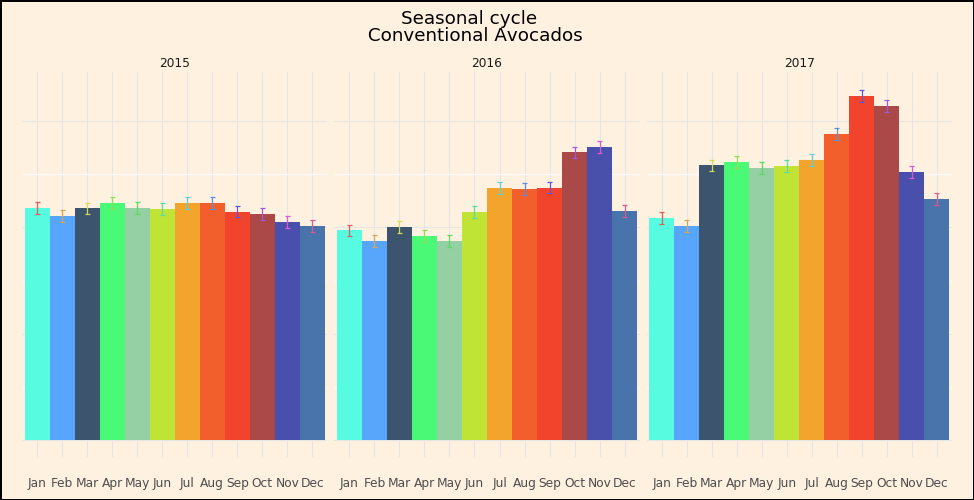

<ggplot: (-9223372029287948186)>

In [217]:
# plotnine does not have coord_polar

conv_df = conv_df.reset_index()

ordered_months = CategoricalDtype(categories = months, ordered = True)
conv_df['ordered_months'] = conv_df['month'].astype(str).astype(ordered_months)

(ggplot(conv_df, aes(x='ordered_months', y='AveragePrice', fill='ordered_months'))
+ geom_bar(width=1, stat='identity') 
+ geom_errorbar(aes(ymin = conv_df['AveragePrice'] - np.sqrt(np.var(conv_df['AveragePrice'])/len(conv_df['AveragePrice'])), 
                    ymax = conv_df['AveragePrice'] + np.sqrt(np.var(conv_df['AveragePrice'])/len(conv_df['AveragePrice'])),
                    color = 'ordered_months'), 
                    width = .2) 
+ facet_wrap('year') 
+ theme_minimal() 
+ theme(axis_ticks = element_blank(),
        axis_text_y = element_blank(),
        axis_title = element_blank(),
        axis_line = element_blank(),
        figure_size = (12, 5),
        plot_background = element_rect(fill="#FFF1E0"),
        legend_position="none", 
        plot_title = element_text(hjust = 0.5)) 
# + coord_polar() 
+ labs(title="Seasonal cycle \n Conventional Avocados")
+ scale_fill_manual(values=['#57FCE0', '#57A6FC', '#3C546E', '#4AFA76', '#95CFA4', '#C0E436', '#F2A42D', '#F25F2D', '#F2442D',
                           '#AB4949', '#4950AB', '#4974AB'])
)


### line segment & point



In [190]:
price_change = df[df['type'] == 'conventional'].groupby(['year', 'month']).mean()['AveragePrice'].reset_index()

first_year = price_change[price_change['year'] == 2015]['AveragePrice'].values
second_year = price_change[price_change['year'] == 2016]['AveragePrice'].values
third_year = price_change[price_change['year'] == 2017]['AveragePrice'].values

# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

change_df = pd.DataFrame({'months': months, 'first_year': first_year, 'second_year': second_year,
                         'third_year': third_year})

# change_df


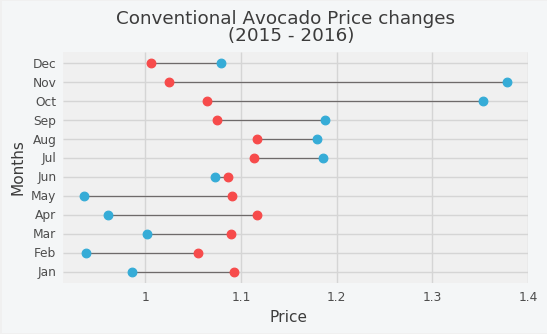

<ggplot: (-9223372029286684188)>

In [199]:

ordered_months = CategoricalDtype(categories = months, ordered = True)
change_df['ordered_months'] = change_df['months'].astype(str).astype(ordered_months)

(ggplot(change_df)
+ geom_segment(aes(x = 'ordered_months', xend = 'ordered_months', y = 'first_year', yend = 'second_year'), color = '#6E6A6A')
+ geom_point(aes(x = 'ordered_months', y = 'first_year'), color = '#F74B4B', size = 3)
+ geom_point(aes(x = 'ordered_months', y = 'second_year'), color = '#36ACD7', size = 3)
+ coord_flip()
+ theme_538()
+ theme(legend_position = 'top',
        figure_size = (6, 3),
        plot_title = element_text(hjust = 0.5),
        plot_background = element_rect(fill = '#F4F6F7'))
+ labs(title = "Conventional Avocado Price changes \n (2015 - 2016)", x = "Months", y = "Price",
    caption = "Red: Year of 2015, Blue: Year of 2016")
)

# plotnine does not support subplot now
